**1.** How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.
________________________________
**Answer :**

If there are two matricies A and B of dimensions (n,k) and (k,m) then the resulting matrix multiplication A × B will have dimensions of (n,m). In resulting matrix each to get each element we need to multiply row of first matrix to column of second matrix. The row of first matrix will have k elemnts and column of second matrix will also have k elements. To multiply row to column we will multiply ith element of row to ith element column of and sum them. So each row to column multiplication will need k multiplications and k-1 additions. Now there are n × m elements in resulting matrix. So the number of multiplications required for A × B is **n × m × k** and the number of additions required is **n×m×(k-1)**.

**2.** Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?
___



In [1]:
import time
import random
import numpy as np


def matmul(A,B):
  n=len(A)
  k_A=len(A[0])
  k_B=len(B)
  m=len(B[0])
  
  if(k_A != k_B):
    print("Matrix multiplication not possible.")
    return 0

  result = [[0 for i in range(m)] for j in range(n)]
  for i in range(n):
    for j in range(m):
      sum=0
      for z in range(k_A):
        sum += A[i][z]*B[z][j]
      
      result[i][j] = sum
  
  return result

# x=[[1,2,3],[4,5,6]]
# y=[[1,2,3,4],[3,4,5,6],[5,6,7,8]]
# print(matmul(x,y))
time_matmul=[]
time_npmatmul=[]

n=20
k=30
m=40
for i in range(100):
  X=[[(random.randint(0,1000)) for _ in range(k)] for __ in range(n)]
  Y=[[(random.randint(0,1000)) for _ in range(m)] for __ in range(k)]

  start_time = time.time()
  matmul(X,Y)
  end_time = time.time()

  time_matmul.append(end_time - start_time)

  x=np.array(X)
  y=np.array(Y)
  start_time = time.time()
  np.matmul(x,y)
  end_time = time.time()

  time_npmatmul.append(end_time - start_time)

print("Average time taken to multiply", n ,"*",k,"matrix to", k,"*",m,"matrix by normal method is:",sum(time_matmul)/100,"and the standard deviation is:",np.std(time_matmul))
print("Average time taken to multiply", n ,"*",k,"matrix to", k,"*",m,"matrix by numpy method is:",sum(time_npmatmul)/100,"and the standard deviation is:",np.std(time_npmatmul))

Average time taken to multiply 20 * 30 matrix to 30 * 40 matrix by normal method is: 0.008485236167907716 and the standard deviation is: 0.0038750214140758493
Average time taken to multiply 20 * 30 matrix to 30 * 40 matrix by numpy method is: 8.517026901245118e-05 and the standard deviation is: 5.997675949154976e-05


The matrix multiplication with normal method is of O(n * k * m). The numpy matrix multiplications because looping methods of numpy are more optimized and it also uses vectorization methods.

**3.** Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?
___

Finding the first highest needs one pass of the array which means that the finding highest needs O(n) time complexity. Finding the second highest needs first highest and one pass of the array which means the time complexity for finding second highest is 2\*O(n) similarly finding ith highest needs i passes which have i*O(n) complexity. The median of array with length n is (n/2)th highest. Which means to find the median we need n/2 passes of array. So finding median will have O(n * n) complexity. 


But if we sort the array then we can directly get the median from $(\frac{n+1}{2})^{th} $  element for odd n and $\frac{(n/2)^{th} + (n/2 + 1)^{th}}{2}$ for even n. The sorting of an array need O(nlog(n)) time complexity which is better than normal method. 



In [2]:

def median(A):
  n=len(A)
  high=[]
  for i in range((n//2)+1):
    temp = A[0]
    for j in range(len(A)):
      if(temp<A[j]):
        temp=A[j]
    high.append(temp)
    A.remove(temp)
  
  if(n%2==0):
    return (high[len(high)-2]+high[len(high)-1])/2
  else:
    return high[len(high)-1]


def better_median(A):
  n=len(A)
  A.sort()
  if(n%2==0):
    return (A[n//2]+A[(n//2)-1])/2
  else:
    return A[n//2]


# x=[9,5,4,3,2,1,6,7,8]
# y=x.copy()
# print(median(x))
# print(better_median(y))

time_median=[]
time_better_median=[]
time_np_median=[]
num=1000
for i in range(100):
  X=[(random.randint(0,10000)) for _ in range(num)]
  Y=X.copy()

  start_time = time.time()
  median(X)
  end_time = time.time()

  time_median.append(end_time - start_time)

  start_time = time.time()
  better_median(Y)
  end_time = time.time()
  time_better_median.append(end_time - start_time)

  start_time = time.time()
  np.median(Y)
  end_time = time.time()
  time_np_median.append(end_time - start_time)


print("Average time taken to find median by normal method is:",sum(time_median)/100,"and the standard deviation is:",np.std(time_median))
print("Average time taken to find median by better method is:",sum(time_better_median)/100,"and the standard deviation is:",np.std(time_better_median))
print("Average time taken to find median by numpy method is:",sum(time_np_median)/100,"and the standard deviation is:",np.std(time_np_median))

Average time taken to find median by normal method is: 0.030748538970947266 and the standard deviation is: 0.007932257533868505
Average time taken to find median by better method is: 0.00013077259063720703 and the standard deviation is: 1.7139775511375674e-05
Average time taken to find median by numpy method is: 0.0003184819221496582 and the standard deviation is: 0.00021925027937391836


**4.** What is the gradient of the following function with respect to x and y?
___

$ \frac{\partial }{\partial x} (x^2y + y^3 sin(x)) = 2xy + y^3cos(x)$

  
$ \frac{\partial }{\partial y} (x^2y + y^3 sin(x)) = x^2 + 3y^2 sin(x)$

**5.** Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.
______


In [3]:
import jax
jnp = jax.numpy
import math

def fun(x,y):
  return ((x**2)*y + (y**3)*jnp.sin(x))

def diff_x(x,y):
  return (2*x*y + (y**3)*jnp.cos(x))

def diff_y(x,y):
  return (x**2 + 3*(y**2)*jnp.sin(x))

f_x=jax.grad(fun=fun, argnums = (0))
f_y=jax.grad(fun=fun, argnums = (1))

check_x_fun = []
check_x_jax = []
check_y_fun = []
check_y_jax = []
print("x,y,f'x,f'x_jax,f'y,f'y_jax")

for i in range(20):
  x=np.random.uniform(0,100)
  y=np.random.uniform(0,100)

  print(x,y,diff_x(x,y),f_x(x,y),diff_y(x,y),f_y(x,y))  
  check_x_fun.append(diff_x(x,y))
  check_x_jax.append(f_x(x,y))
  check_y_fun.append(diff_y(x,y))
  check_y_jax.append(f_y(x,y))
  

if(np.allclose(check_x_fun,check_x_jax)):
  print("differentiation with respect to x is correct.")
else:
  print("differentiation with respect to x is not correct.")

if(np.allclose(check_y_fun,check_y_jax)):
  print("differentiation with respect to y is correct.")
else:
  print("differentiation with respect to y is not correct.")

x,y,f'x,f'x_jax,f'y,f'y_jax
68.95465322465255 32.77874428894708 39287.465 39287.465 4239.9746 4239.9746
62.640175408836804 28.61285354222558 26580.828 26580.828 3455.8909 3455.8906
50.865170920965774 59.63199433430783 181116.16 181116.16 8608.072 8608.073
12.81915598700143 5.791948158717696 336.62137 336.62137 189.50098 189.50098
56.15272500303854 86.22369383555082 601121.2 601121.2 -5448.8696 -5448.8696
5.445750655764958 23.617210548406288 9074.873 9074.873 -1213.4991 -1213.4991
82.28570206143834 69.78182996955663 291108.56 291108.56 15071.25 15071.25
47.553081609684654 87.62003338567631 -603338.8 -603338.8 -7323.0693 -7323.0693
88.24258549421018 31.148955479597184 34559.562 34559.562 8585.537 8585.538
28.201721618727007 38.7081724368068 -55661.23 -55661.23 1121.442 1121.442
65.10168616582584 23.36760877552716 -5168.108 -5168.108 5492.162 5492.162
92.36470383328773 39.85063185580936 -12081.811 -12081.811 3997.4429 3997.4429
44.08810171617639 98.53201777656716 959942.8 959942.8 5019.60

**6.** Use sympy to confirm that you obtain the same gradient analytically.
____


In [4]:
import sympy as smp
x,y = smp.symbols('x y')

f=(x*x*y+y*y*y*smp.sin(x))

print(smp.diff(f,x))
print(smp.diff(f,y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


**7.** Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
_______


In [5]:
data = {
    2022: {
        'Branch 1': [{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}],
        'Branch 2': []},
    2023: {
        'Branch 1': [],
        'Branch 2': [],
    },
    2024: {
        'Branch 1': [],
        'Branch 2': [],
    },
    2025: {
        'Branch 1': [],
        'Branch 2': [],
    },
}

print(data)

{2022: {'Branch 1': [{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}], 'Branch 2': []}, 2023: {'Branch 1': [], 'Branch 2': []}, 2024: {'Branch 1': [], 'Branch 2': []}, 2025: {'Branch 1': [], 'Branch 2': []}}


**8.** Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

______


In [6]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

database = [
    Year(2022, [
        Branch('Branch 1', [
            Student(1, 'N', {'Maths': 100, 'English': 70}),
            Student(2, 'M', {'Maths': 85, 'Science': 101})
        ]),
        Branch('Branch 2', []),
    ]),
    Year(2023, [
        Branch('Branch 1', []),
        Branch('Branch 2', []),
    ]),
    Year(2024, [
        Branch('Branch 1', []),
        Branch('Branch 2', []),
    ]),
    Year(2025, [
        Branch('Branch 1', []),
        Branch('Branch 2', []),
    ]),
]

print(database[0].branches[0].students[1].marks)

{'Maths': 85, 'Science': 101}


**9.** Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
_______


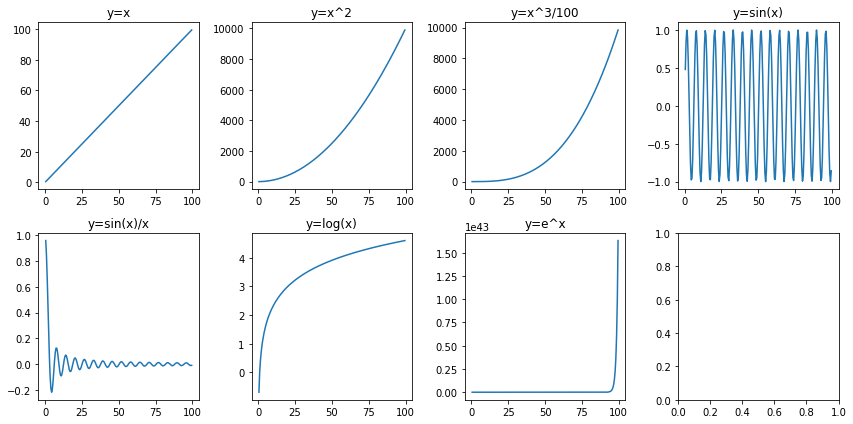

In [7]:
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.0, 0.5)

y1 = x 
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(2, 4)

axs[0,0].plot(x, y1)
axs[0,0].set_title('y=x')
axs[0,1].plot(x, y2)
axs[0,1].set_title('y=x^2')
axs[0,2].plot(x, y3)
axs[0,2].set_title('y=x^3/100')
axs[0,3].plot(x, y4)
axs[0,3].set_title('y=sin(x)')
axs[1,0].plot(x, y5)
axs[1,0].set_title('y=sin(x)/x')
axs[1,1].plot(x, y6)
axs[1,1].set_title('y=log(x)')
axs[1,2].plot(x, y7)
axs[1,2].set_title('y=e^x')

fig.set_figheight(6)
fig.set_figwidth(12)
fig.tight_layout()

**10.** Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.
_____



In [8]:
import pandas as pd

matrix = np.random.uniform(1,2, size =(20,5))

data = pd.DataFrame(matrix, columns = ['a','b','c','d','e'])

highest_std_column = data.std().idxmax()
lowest_mean_row = data.mean(axis=1).idxmin()

print(data)
print("column with highest standard deviation is:", highest_std_column)
print("row with lowest mean is:", lowest_mean_row)

           a         b         c         d         e
0   1.181308  1.534958  1.230699  1.652625  1.680989
1   1.557160  1.713504  1.934899  1.056022  1.210080
2   1.964681  1.642497  1.562950  1.456833  1.790921
3   1.810606  1.593529  1.690246  1.978768  1.136843
4   1.417275  1.690856  1.404301  1.975611  1.839391
5   1.669998  1.793677  1.129168  1.038017  1.555535
6   1.508008  1.675953  1.435019  1.416335  1.724127
7   1.207059  1.627419  1.658002  1.253294  1.408711
8   1.771249  1.005246  1.820523  1.883600  1.865579
9   1.072250  1.515024  1.558032  1.385245  1.179938
10  1.535942  1.133329  1.813370  1.180267  1.090722
11  1.414948  1.969748  1.278252  1.836493  1.139312
12  1.345968  1.397537  1.559133  1.305000  1.668706
13  1.124050  1.282544  1.231640  1.673575  1.692348
14  1.022398  1.209493  1.890807  1.923155  1.432094
15  1.942605  1.788939  1.743306  1.906076  1.195595
16  1.646201  1.208622  1.099910  1.600427  1.400856
17  1.143421  1.396374  1.444223  1.717401  1.

**11.** Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.
_______



In [9]:
data['f'] = data[['a','b','c','d','e']].sum(axis=1)

data['g'] = data['f'].apply(lambda x: "LT8" if x<8 else "GT8")

print(data)

num = data['g'].value_counts()["LT8"]
print("Number of rows in the dataframe where the value in the column “g” is “LT8”: ", num)

stdv_lt8 = data.loc[data['g']=="LT8",'f'].std()
stdv_gt8 = data.loc[data['g']=="GT8",'f'].std()
print("Standard deviation of column 'f' where column 'g' is LT8: ", stdv_lt8)
print("Standard deviation of column 'f' where column 'g' is GT8: ", stdv_gt8)

           a         b         c         d         e         f    g
0   1.181308  1.534958  1.230699  1.652625  1.680989  7.280578  LT8
1   1.557160  1.713504  1.934899  1.056022  1.210080  7.471664  LT8
2   1.964681  1.642497  1.562950  1.456833  1.790921  8.417883  GT8
3   1.810606  1.593529  1.690246  1.978768  1.136843  8.209992  GT8
4   1.417275  1.690856  1.404301  1.975611  1.839391  8.327433  GT8
5   1.669998  1.793677  1.129168  1.038017  1.555535  7.186396  LT8
6   1.508008  1.675953  1.435019  1.416335  1.724127  7.759442  LT8
7   1.207059  1.627419  1.658002  1.253294  1.408711  7.154486  LT8
8   1.771249  1.005246  1.820523  1.883600  1.865579  8.346197  GT8
9   1.072250  1.515024  1.558032  1.385245  1.179938  6.710488  LT8
10  1.535942  1.133329  1.813370  1.180267  1.090722  6.753629  LT8
11  1.414948  1.969748  1.278252  1.836493  1.139312  7.638753  LT8
12  1.345968  1.397537  1.559133  1.305000  1.668706  7.276344  LT8
13  1.124050  1.282544  1.231640  1.673575  1.69

**12.** Write a small piece of code to explain broadcasting in numpy.
____


In [10]:
x = [[1,2,3,4],[5,6,7,8],[9,1,2,3]]
matrix=np.array(x)
print("original matrix")
print(matrix)
print("a single integer 5 is added in all elements of matrix")
print(matrix+5)
y=np.array([10,20,30,40])
print("a row is added with every row of matrix")
print(matrix+y)
z=np.array([[100],[200],[300]])
print("a column is added with every column of matrix")
print(matrix+z)

original matrix
[[1 2 3 4]
 [5 6 7 8]
 [9 1 2 3]]
a single integer 5 is added in all elements of matrix
[[ 6  7  8  9]
 [10 11 12 13]
 [14  6  7  8]]
a row is added with every row of matrix
[[11 22 33 44]
 [15 26 37 48]
 [19 21 32 43]]
a column is added with every column of matrix
[[101 102 103 104]
 [205 206 207 208]
 [309 301 302 303]]


**13.** Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [12]:
def argmin(A):
  n=len(A)
  temp = A[0]
  index = 0
  for i in range(n):
    if(temp>A[i]):
      temp = A[i]
      index = i
  
  return index

# x=[5,123,4,5,62,87,5,2,6,1,2,3,7]
# print(argmin(x))
# print(np.argmin(np.array(x)))

n=20
check=0
for i in range(20):
  x = [(random.randint(0,200)) for _ in range(n)]
  print(x,np.argmin(x),argmin(x))
  if(np.argmin(x) == argmin(x)):
    check+=1

if(check==20):
  print("Argmin function is working correctly.")
else:
  print("Argmin function is not working correctly.")

[61, 197, 177, 71, 55, 157, 125, 37, 39, 165, 65, 79, 170, 20, 177, 71, 24, 124, 37, 96] 13 13
[90, 42, 110, 33, 149, 6, 126, 25, 186, 163, 157, 69, 49, 57, 53, 102, 129, 111, 51, 11] 5 5
[195, 163, 196, 195, 133, 77, 69, 161, 166, 76, 118, 42, 175, 130, 43, 142, 23, 87, 119, 40] 16 16
[181, 83, 31, 72, 144, 198, 86, 35, 57, 190, 10, 153, 182, 7, 103, 125, 1, 71, 195, 113] 16 16
[197, 132, 88, 187, 42, 166, 147, 199, 145, 87, 77, 106, 170, 35, 16, 169, 146, 67, 27, 52] 14 14
[34, 183, 22, 151, 80, 2, 101, 125, 9, 114, 143, 95, 37, 88, 115, 149, 170, 92, 133, 150] 5 5
[84, 66, 95, 9, 174, 109, 191, 32, 25, 174, 131, 155, 73, 53, 89, 109, 64, 28, 75, 122] 3 3
[1, 110, 71, 174, 124, 175, 103, 59, 193, 78, 31, 61, 179, 147, 91, 151, 30, 120, 78, 18] 0 0
[25, 157, 16, 72, 162, 63, 45, 129, 0, 183, 5, 120, 82, 11, 8, 182, 158, 7, 52, 149] 8 8
[90, 2, 73, 33, 77, 25, 23, 87, 189, 177, 29, 169, 155, 64, 126, 182, 85, 175, 118, 144] 1 1
[163, 45, 141, 157, 56, 39, 10, 123, 159, 151, 160, 82, 77